## This a Machine Learning Model that predicts the toss winner and match winner for the IPL 2025 Matches.



#### Importing the libraries.
Import all required ML libraries, preprocessing tools, metrics, and visualization packages.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#### Loadind the datasets.
matches.csv: Match-level data

deliveries.csv: Ball-by-ball data

In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

#### Cleaning the data sets.
Ensures consistent and clean data for training.
Handles missing/null values.
Standardizes team names.
Fixes overs from 0–19 → 1–20.

In [4]:
matches['player_of_match'].fillna('Unknown', inplace=True)
matches['city'].fillna('Unknown', inplace=True)
matches['winner'].fillna('No Result', inplace=True)
matches['result_margin'].fillna(0, inplace=True)
matches['target_runs'].fillna(0, inplace=True)
matches['target_overs'].fillna(0, inplace=True)
matches.loc[matches['venue'] == 'Sharjah Cricket Stadium', 'city'] = 'Sharjah'
matches.loc[matches['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'

team_fixes = {
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Kings XI Punjab':'Punjab Kings',
    
}
deliveries['batting_team'] = deliveries['batting_team'].replace(team_fixes)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_fixes)
deliveries['over'] = deliveries['over'] + 1

C:\Users\abhin\AppData\Local\Temp\ipykernel_21884\4044611842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['player_of_match'].fillna('Unknown', inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_21884\4044611842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

#### Data Encoding.
Converts strings (team/venue/decision) into machine-readable numeric values

In [5]:
team_encoder = LabelEncoder()
venue_encoder = LabelEncoder()
decision_encoder = LabelEncoder()

team_encoder.fit(pd.concat([matches['team1'], matches['team2'], matches['toss_winner'], matches['winner']]))
venue_encoder.fit(matches['venue'])
decision_encoder.fit(matches['toss_decision'])

LabelEncoder()

#### Toss MOdel Training

In [9]:
toss_data = matches[['team1', 'team2', 'venue', 'toss_winner']].dropna()
toss_data['team1'] = team_encoder.transform(toss_data['team1'])
toss_data['team2'] = team_encoder.transform(toss_data['team2'])
toss_data['venue'] = venue_encoder.transform(toss_data['venue'])
toss_data['toss_winner'] = team_encoder.transform(toss_data['toss_winner'])

X_toss = toss_data[['team1', 'team2', 'venue']]
y_toss = toss_data['toss_winner']
X_train_toss, X_test_toss, y_train_toss, y_test_toss = train_test_split(X_toss, y_toss, test_size=0.2, random_state=42)

#### Toss Model Comaprisons.

In [8]:
toss_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC()
}

toss_results = []
print("🔍 Toss Model Comparison:\n")
for name, model in toss_models.items():
    model.fit(X_train_toss, y_train_toss)
    y_pred = model.predict(X_test_toss)
    acc = accuracy_score(y_test_toss, y_pred)
    toss_results.append((name, model, acc))
    print(f"{name} Accuracy: {acc:.4f}")

🔍 Toss Model Comparison:

Random Forest Accuracy: 0.4521


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.2283
KNN Accuracy: 0.3699
Decision Tree Accuracy: 0.4475
Gradient Boosting Accuracy: 0.5114
SVC Accuracy: 0.3470


#### Choosing Best Toss Model.

In [10]:
best_toss_model = max(toss_results, key=lambda x: x[2])
toss_model = best_toss_model[1]
print(f"\n Best Toss Model: {best_toss_model[0]} with Accuracy: {best_toss_model[2]:.4f}")



 Best Toss Model: Gradient Boosting with Accuracy: 0.5114


#### MAtch Model Training.

In [11]:
match_data = matches[['team1', 'team2', 'venue', 'toss_winner', 'toss_decision', 'winner']].dropna()
match_data['team1'] = team_encoder.transform(match_data['team1'])
match_data['team2'] = team_encoder.transform(match_data['team2'])
match_data['venue'] = venue_encoder.transform(match_data['venue'])
match_data['toss_winner'] = team_encoder.transform(match_data['toss_winner'])
match_data['toss_decision'] = decision_encoder.transform(match_data['toss_decision'])
match_data['winner'] = team_encoder.transform(match_data['winner'])

X_match = match_data[['team1', 'team2', 'venue', 'toss_winner', 'toss_decision']]
y_match = match_data['winner']
X_train_match, X_test_match, y_train_match, y_test_match = train_test_split(X_match, y_match, test_size=0.2, random_state=42)


#### MAtch Model Comparison.

In [12]:
match_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC()
}

match_results = []
print("\n🔍 Match Model Comparison:\n")
for name, model in match_models.items():
    model.fit(X_train_match, y_train_match)
    y_pred = model.predict(X_test_match)
    acc = accuracy_score(y_test_match, y_pred)
    match_results.append((name, model, acc))
    print(f"{name} Accuracy: {acc:.4f}")


🔍 Match Model Comparison:

Random Forest Accuracy: 0.4247


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.1918
KNN Accuracy: 0.3470
Decision Tree Accuracy: 0.4018
Gradient Boosting Accuracy: 0.4566
SVC Accuracy: 0.3242


#### Choosing Best Match Model.

In [13]:
best_match_model = max(match_results, key=lambda x: x[2])
match_model = best_match_model[1]
print(f"\n🏆 Best Match Model: {best_match_model[0]} with Accuracy: {best_match_model[2]:.4f}")


🏆 Best Match Model: Gradient Boosting with Accuracy: 0.4566


#### Prediction Function.

In [14]:
def predict_winner(team1, team2,venue):
    if team1 not in team_encoder.classes_ or team2 not in team_encoder.classes_:
        raise ValueError(f"Unknown team: {team1} or {team2}")
    if venue not in venue_encoder.classes_:
        print(f"⚠️ Warning: Venue '{venue}' not in training data. Using fallback 'Wankhede Stadium'.")
        venue = 'Wankhede Stadium'
    t1 = team_encoder.transform([team1])[0]
    t2 = team_encoder.transform([team2])[0]
    v = venue_encoder.transform([venue])[0]
    d = decision_encoder.transform(['field'])[0]
    toss_encoded = toss_model.predict([[t1, t2, v]])[0]
    toss_winner = team_encoder.inverse_transform([toss_encoded])[0]
    winner_encoded = match_model.predict([[t1, t2, v, toss_encoded, d]])[0]
    match_winner = team_encoder.inverse_transform([winner_encoded])[0]
    return toss_winner, match_winner

In [15]:
# See all team names used during model training
print(sorted(team_encoder.classes_))


['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'No Result', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad']


#### 2025 IPL Prediction.

## Match 1 : 22/03/2025
#### Kolkata Knight Riders VS Royal Challengers Banglore.
#### Venue: Eden Gardens,Kolkata.


 Kolkata Knight Riders vs Royal Challengers Bangalore at Eden Gardens
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Kolkata Knight Riders


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


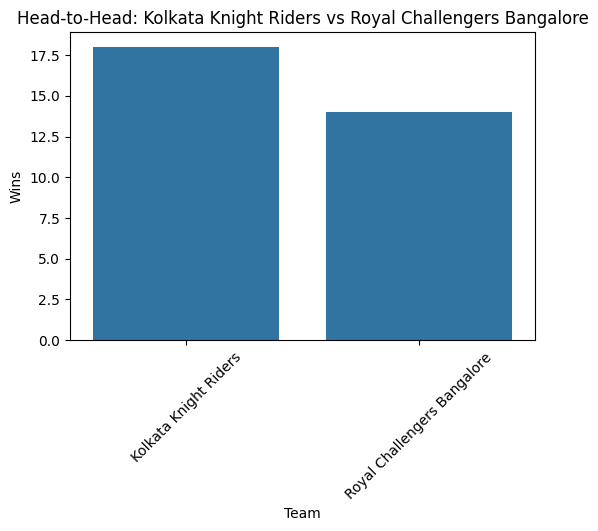

In [16]:

team1 = 'Kolkata Knight Riders'
team2 = 'Royal Challengers Bangalore'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2,venue)

print(f"\n {team1} vs {team2} at {venue}" )
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


## Match 2 : 23/03/2025
#### Sunrisers Hyderabad vs Rajasthan Royals.
#### Venue: Rajiv Gandhi International Stadium,Hyderabad.


 Sunrisers Hyderabad vs Rajasthan Royals at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Sunrisers Hyderabad


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


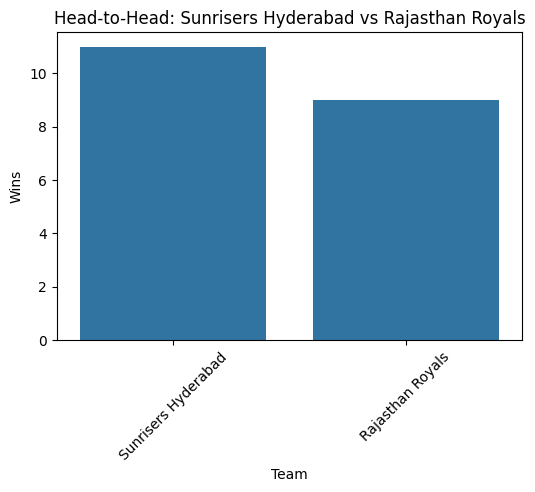

In [17]:

team1 = 'Sunrisers Hyderabad'
team2 = 'Rajasthan Royals'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


## Match 3 : 23/03/2025
#### Chennai Super Kings VS Mumbai Indians.
#### Venue:MA Chidambaram Stadium,Chennai .



 Chennai Super Kings vs Mumbai Indians at MA Chidambaram Stadium
 Predicted Toss Winner: Chennai Super Kings
 Predicted Match Winner: Mumbai Indians


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


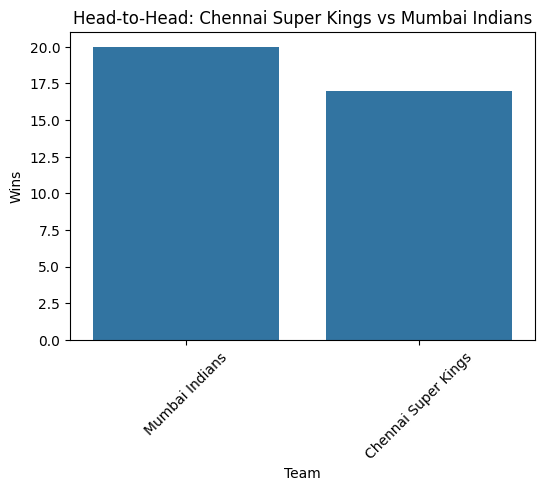

In [18]:
team1 = 'Chennai Super Kings'
team2 = 'Mumbai Indians'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


## Match 4 : 24/03/2025
#### Delhi Capitals VS Lucknow Super Giants.
#### Venue:ACA-VDCA Cricket Stadium, Vishakhapatnam .


⚠️ Warning: Venue 'ACA-VDCA Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Delhi Capitals vs Lucknow Super Giants at ACA-VDCA Cricket Stadium
 Predicted Toss Winner: Lucknow Super Giants
 Predicted Match Winner: Delhi Capitals


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


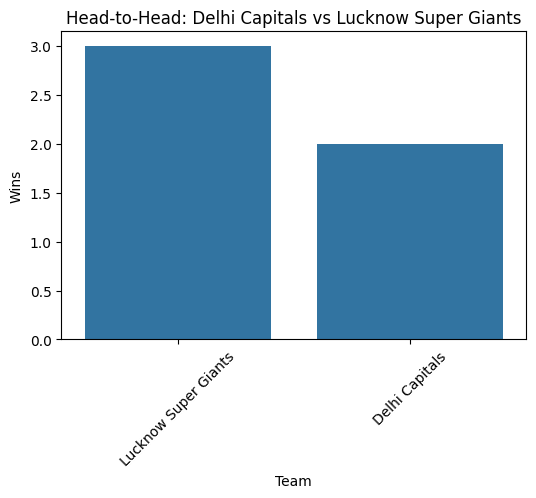

In [19]:
team1 = 'Delhi Capitals'
team2 = 'Lucknow Super Giants'
venue = 'ACA-VDCA Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 5 : 25/03/2025
#### Gujarat Titans VS Punjab Kings.
#### Venue:Narendra Modi Stadium,Ahemdabad .


⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Punjab Kings at Narendra Modi Stadium
 Predicted Toss Winner: Gujarat Titans
 Predicted Match Winner: Punjab Kings


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


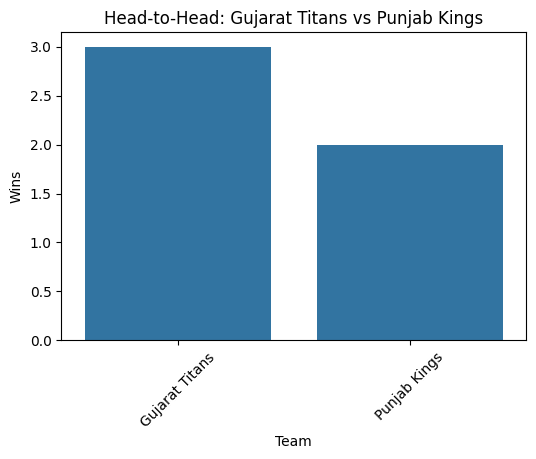

In [20]:
team1 = 'Gujarat Titans'
team2 = 'Punjab Kings'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 6 : 26/03/2025
#### Rajasthan Royals VS Kolkata Knight Riders.
#### Venue:Barsapara Stadium,Guwhati .

⚠️ Warning: Venue 'Barsapara Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Rajasthan Royals vs Kolkata Knight Riders at Barsapara Stadium
 Predicted Toss Winner: Kolkata Knight Riders
 Predicted Match Winner: Kolkata Knight Riders


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


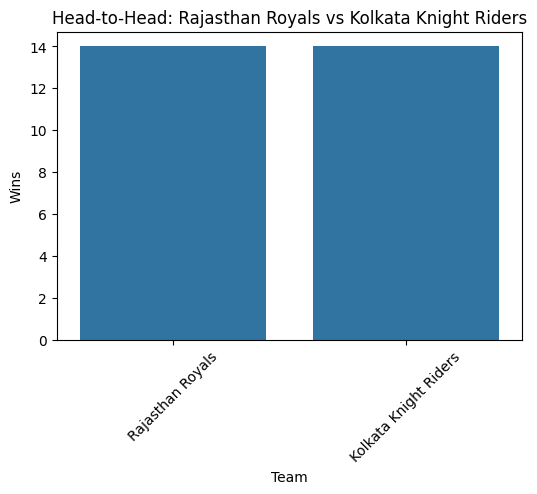

In [21]:
team1 = 'Rajasthan Royals'
team2 = 'Kolkata Knight Riders'
venue = 'Barsapara Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 7: 27/03/2025
#### Sunrisers Hyderabad VS Lucknow Super Giants.
#### Venue:Rajiv Gandhi International Stadium,Hyderabad .


 Sunrisers Hyderabad vs Lucknow Super Giants at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Lucknow Super Giants


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


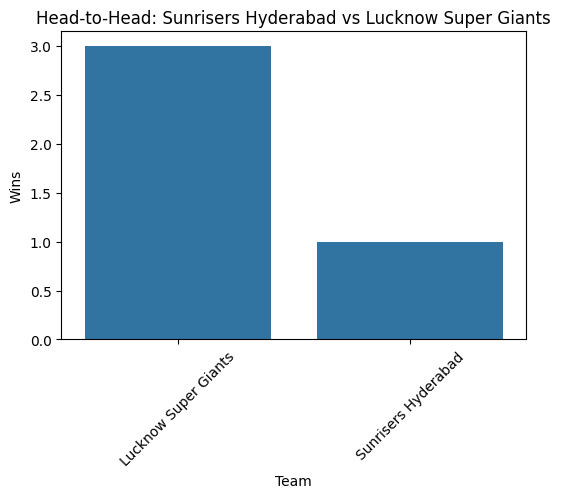

In [22]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Lucknow Super Giants'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 8: 28/03/2025
#### Chennai Super Kings VS Royal Challengers Bangalore .
#### Venue:MA Chidambaram Stadium, Chennai .


 Chennai Super Kings vs Royal Challengers Bangalore at MA Chidambaram Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Chennai Super Kings


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


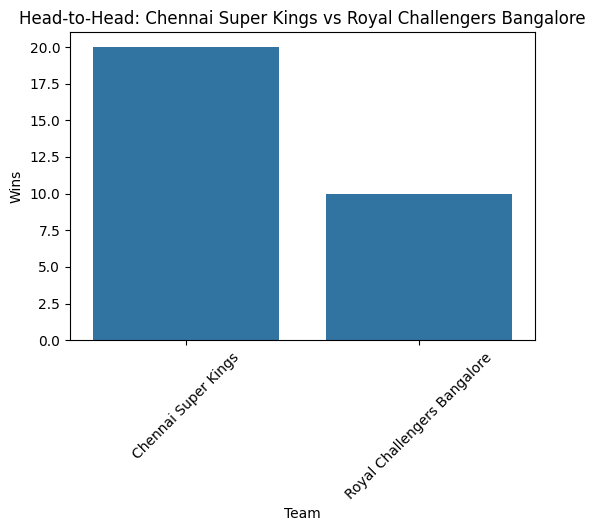

In [23]:
team1 = 'Chennai Super Kings'
team2 = 'Royal Challengers Bangalore'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 9: 29/03/2025
#### Gujarat Titans VS Mumbai Indians .
#### Venue:Narendra Modi Stadium,Ahemdabad .

⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Mumbai Indians at Narendra Modi Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Gujarat Titans


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


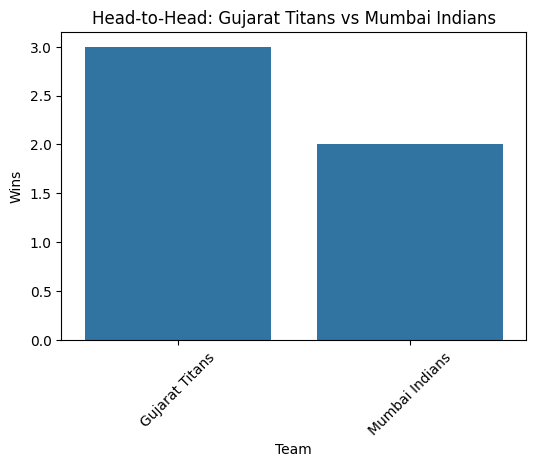

In [24]:
team1 = 'Gujarat Titans'
team2 = 'Mumbai Indians'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 10: 30/03/2025
#### Delhi Capitals VS Sunrisers Hyderabad .
#### Venue: ACA-VDCA Cricket Stadium.

⚠️ Warning: Venue 'ACA-VDCA Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Delhi Capitals vs Sunrisers Hyderabad at ACA-VDCA Cricket Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


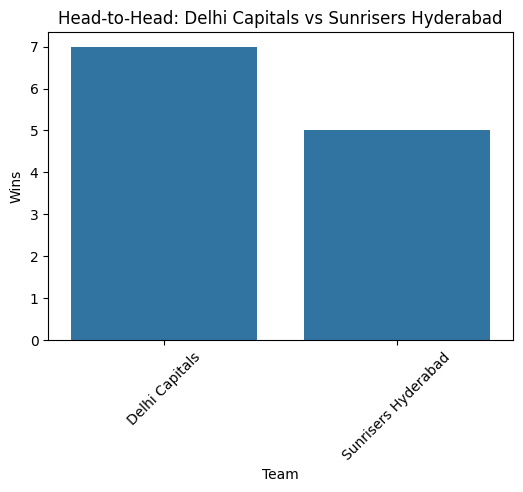

In [25]:
team1 = 'Delhi Capitals'
team2 = 'Sunrisers Hyderabad'
venue = 'ACA-VDCA Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 11: 30/03/2025
#### Rajasthan Royals VS Chennai Super Kings .
#### Venue:Barsapara Stadium.

⚠️ Warning: Venue 'Barsapara Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Rajasthan Royals vs Chennai Super Kings at Barsapara Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Chennai Super Kings


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


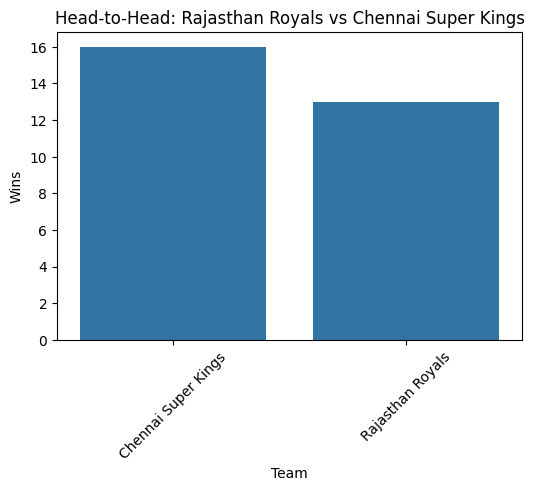

In [26]:
team1 = 'Rajasthan Royals'
team2 = 'Chennai Super Kings'
venue = 'Barsapara Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 12: 31/03/2025
#### Mumbai Indians VS Kolkata Knight Riders .
#### Venue:Wankhede Stadium.


 Mumbai Indians vs Kolkata Knight Riders at Wankhede Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Mumbai Indians


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


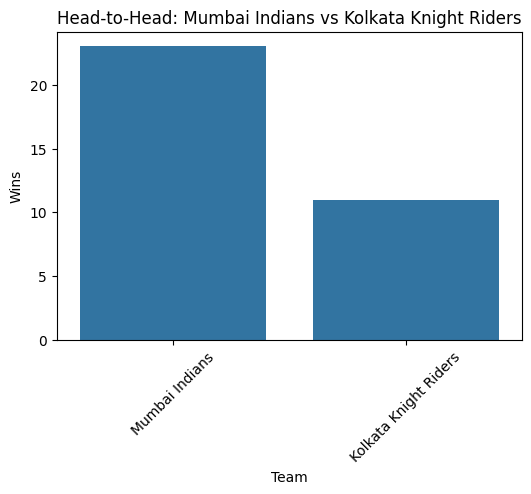

In [27]:
team1 = 'Mumbai Indians'
team2 = 'Kolkata Knight Riders'
venue = 'Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 13: 1/04/2025
#### Lucknow Super Giants VS Punjab Kings .
#### Venue:Ekana Cricket Stadium .

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Punjab Kings at Ekana Cricket Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Lucknow Super Giants


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


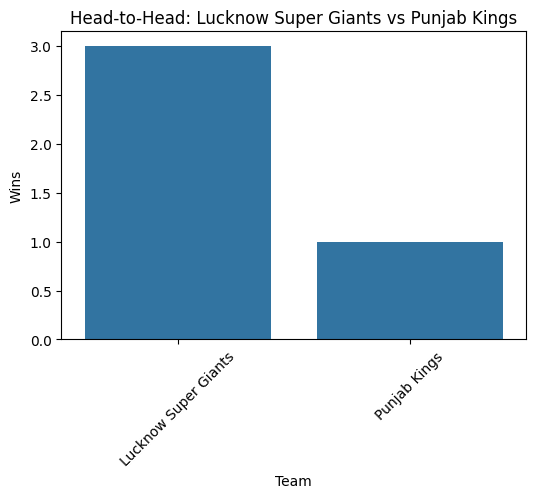

In [34]:
team1 = 'Lucknow Super Giants'
team2 = 'Punjab Kings'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 14: 2/04/2025
#### Royal Challengers Bangalore  VS Gujarat Titans .
#### Venue:M. Chinnaswamy Stadium .

⚠️ Warning: Venue 'M. Chinnaswamy Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Royal Challengers Bangalore vs Gujarat Titans at M. Chinnaswamy Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Gujarat Titans


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


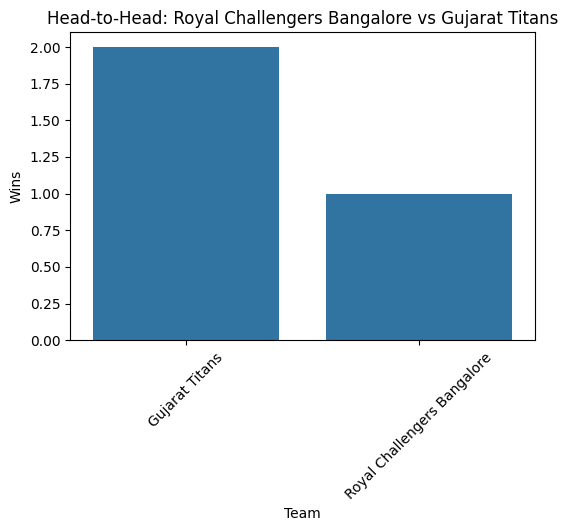

In [29]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Gujarat Titans'
venue = 'M. Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 15: 3/04/2025
#### Kolkata Knight Riders  VS Sunrisers Hyderabad .
#### Venue:Eden Gardenns .


 Kolkata Knight Riders vs Sunrisers Hyderabad at Eden Gardens
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Kolkata Knight Riders


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


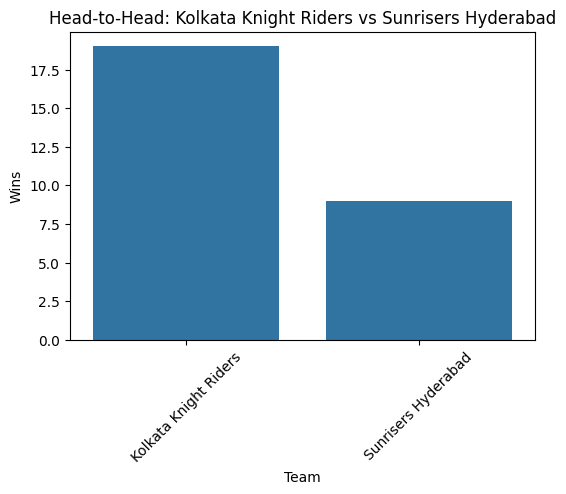

In [30]:
team1 = 'Kolkata Knight Riders'
team2 = 'Sunrisers Hyderabad'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 16: 4/04/2025
#### Lucknow Super Giants VS Mumbai Indians .
#### Venue:Ekana Cricket Stadium. 

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Mumbai Indians at Ekana Cricket Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Lucknow Super Giants


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


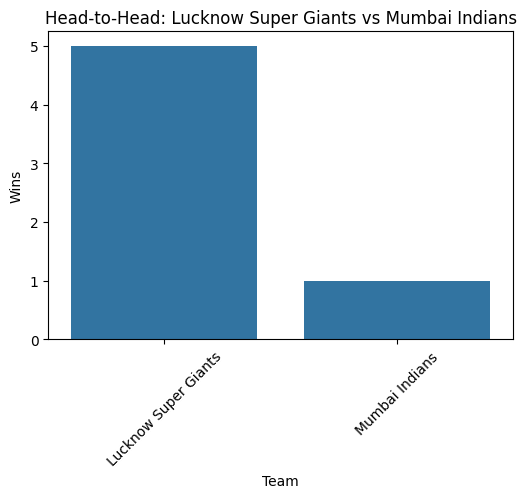

In [31]:
team1 = 'Lucknow Super Giants'
team2 = 'Mumbai Indians'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 17: 5/04/2025
### Chennai Super Kings#   VS Delhi Capitals .
#### Venue:MA Chidambaram Stadium. 


 Chennai Super Kings vs Delhi Capitals at MA Chidambaram Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Chennai Super Kings


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


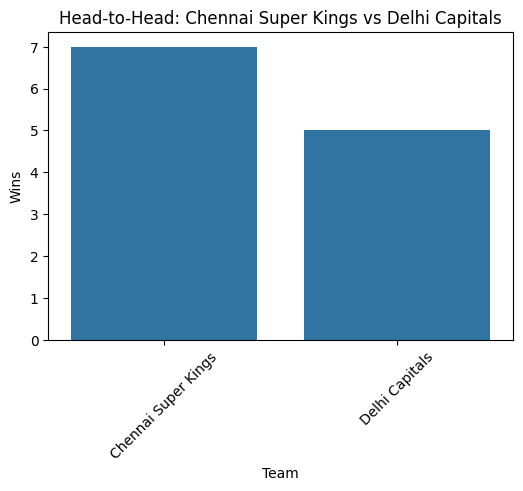

In [32]:

team1 = 'Chennai Super Kings'
team2 = 'Delhi Capitals'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()